# importing data files

In [19]:
import pandas as pd
import numpy as np
global df
df=pd.read_csv("cardio_train.csv")
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [14]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Converting the outliers

### Research Paper Links

Effect of Systolic and Diastolic Blood Pressure on Cardiovascular Outcomes [https://pubmed.ncbi.nlm.nih.gov/31314968/]

Systolic and diastolic hypertension independently predict CVD risk [https://pubmed.ncbi.nlm.nih.gov/31366923/ ]

Evaluation of Optimal Diastolic Blood Pressure Range Among Adults [https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2776530]

In [3]:
# Replacing all the 'ap_hi' values that are lower than 0 to mean value.
# Replacing all the 'ap_hi' values that are above 220 to standard deviation.
#Systolic blood pressure
col_name = 'ap_hi'
q1 = df[col_name].quantile(0.25)
q3 = df[col_name].quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers from the DataFrame
df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

In [4]:
# Replacing all the 'ap_lo' values that are lower than 0 to mean value.
# Replacing all the 'ap_lo' values that are above 140 to standard deviation.
# Diastolic Blood Pressure
col_name = 'ap_lo'
q1 = df[col_name].quantile(0.25)
q3 = df[col_name].quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers from the DataFrame
df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

In [5]:
# Age is in the total number of days, we divided all the values of 'age' by 365 to convert the 'age' from number of days to number of years. 
# Age To Years
df['age']=[i/365 for i in df['age']]

In [6]:
# Next, we drop the 'id' column as it is of no use in our project.
df=df.drop(['id'],axis=1)

# Verifing the updates

In [7]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
5,60.038356,1,151,67.0,120,80,2,2,0,0,0,0
6,60.583562,1,157,93.0,130,80,3,1,0,0,1,0
7,61.873973,2,178,95.0,130,90,3,3,0,0,1,1
8,48.405479,1,158,71.0,110,70,1,1,0,0,1,0
9,54.339726,1,164,68.0,110,60,1,1,0,0,0,0


In [10]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67467.000000,67467.000000,67467.000000,67467.000000,67467.000000,67467.000000,67467.000000,67467.000000,67467.000000,67467.000000,67467.000000,67467.000000
mean,53.297751,1.347978,164.375724,73.995206,125.878237,81.041620,1.360072,1.223428,0.087421,0.052900,0.803741,0.489647
std,6.765322,0.476332,8.163887,14.200626,15.110563,8.857628,0.675928,0.569588,0.282452,0.223835,0.397170,0.499897
min,29.583562,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.339726,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.961644,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.402740,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,170.000000,110.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#  Data Visualisation

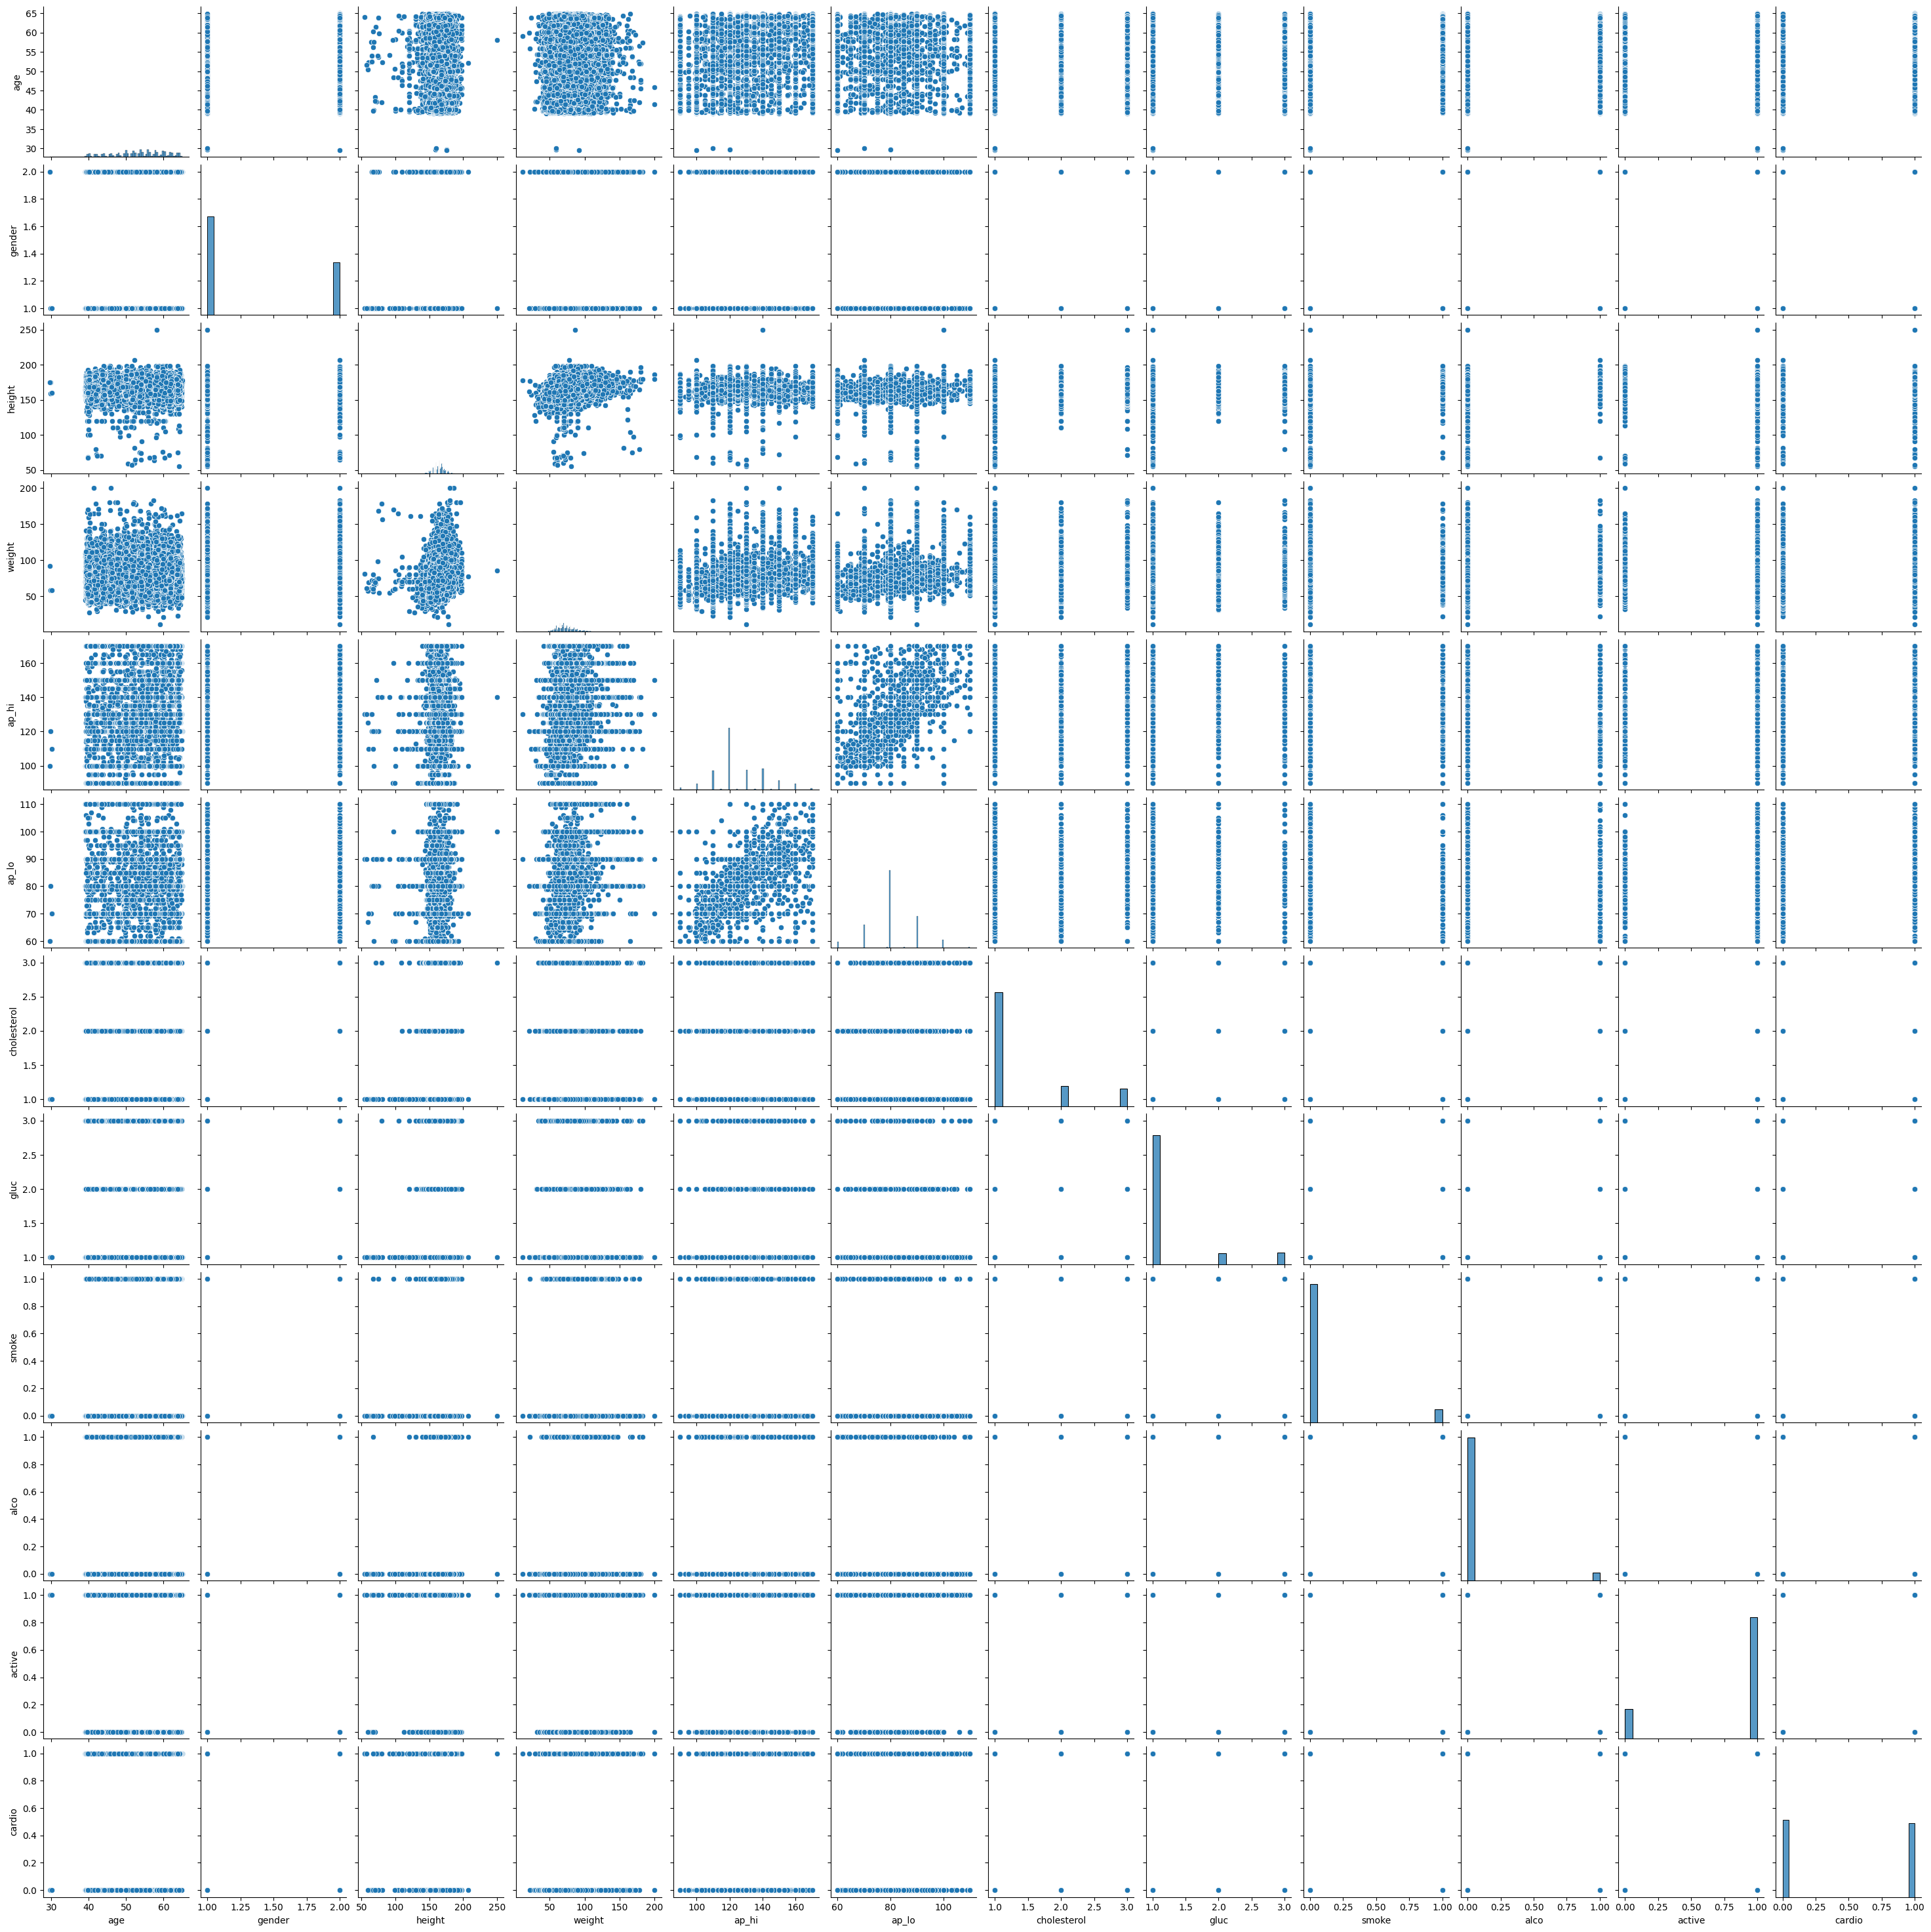

In [11]:
import seaborn as sns 
sns.pairplot(df)

In [12]:
# Verifying the data split in the CVD and Non CVD to understand the skewness of the data , if skewed will apply smote

<AxesSubplot: xlabel='cardio', ylabel='Count'>

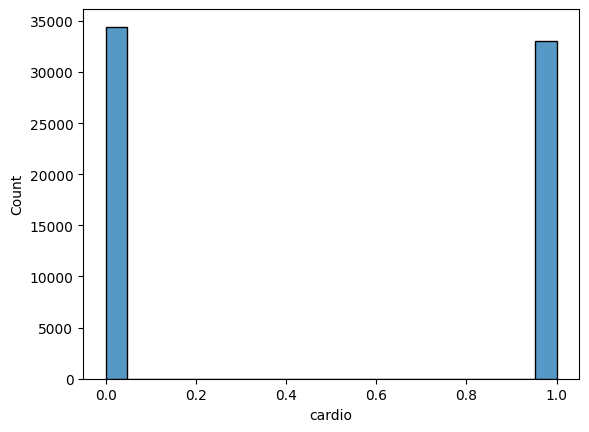

In [22]:
sns.histplot(df['cardio']) 

# Saving the Transformed Data Into A CSV

In [29]:
df.to_csv('transformed_CVD_data.csv',index=False)

# Refactoring code

In [21]:
def iqr_convert(col_name):
    global df
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1

    # Calculate lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter out outliers from the DataFrame
    df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

iqr_convert("ap_hi")
iqr_convert("ap_lo")


In [22]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,64502.000000,64502.000000,64502.000000,64502.000000,64502.000000,64502.000000,64502.000000,64502.000000,64502.000000,64502.000000,64502.000000,64502.000000,64502.000000
mean,49966.522418,19491.930033,1.351896,164.457381,74.261698,126.623469,81.789433,1.364252,1.225652,0.087625,0.053068,0.803479,0.498388
std,28855.797580,2458.792155,0.477565,8.148252,14.142242,14.384632,7.713269,0.680269,0.572663,0.282751,0.224171,0.397370,0.500001
min,0.000000,10859.000000,1.000000,55.000000,11.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24924.250000,17720.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50009.500000,19716.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74878.750000,21343.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Refactored Test Case

In [32]:
import unittest
import pandas as pd


def data_transformation(input_data):

    # Perform the data transformation here
    #Systolic blood pressure
    
    q1 = input_data["ap_hi"].quantile(0.25)
    q3 = input_data["ap_hi"].quantile(0.75)
    iqr = q3 - q1

    # Calculate lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter out outliers from the DataFrame
    transformed_data = input_data[(input_data["ap_hi"] >= lower_bound) & (input_data["ap_hi"] <= upper_bound)]

    return transformed_data

def refactored_data_transformation(col_name,input_data):
    
    q1 = input_data[col_name].quantile(0.25)
    q3 = input_data[col_name].quantile(0.75)
    iqr = q3 - q1

    # Calculate lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter out outliers from the DataFrame
    refactor_transform_data = input_data[(input_data[col_name] >= lower_bound) & (input_data[col_name] <= upper_bound)] 
    return refactor_transform_data

class DataTransformationTest(unittest.TestCase):

    def test_data_transformation(self):

        # Load the input data
        input_data = pd.read_csv("cardio_train.csv")

        # Perform the data transformation
        transformed_data = data_transformation(input_data)

        # Assert that the transformed data is correct
        refactor_transform_data = refactored_data_transformation("ap_hi",input_data)

        # Check if the data frames have the same number of rows and columns.
        if transformed_data.shape != refactor_transform_data.shape:
            raise AssertionError("The two data frames must have the same number of rows and columns.")

        # Check if the data frames have the same column names.
        elif transformed_data.columns.tolist() != refactor_transform_data.columns.tolist():
            raise AssertionError("The two data frames must have the same column names.")

        # Check if the data frames have the same index labels.
        elif transformed_data.index.tolist() != refactor_transform_data.index.tolist():
            raise AssertionError("The two data frames must have the same index labels.")
        
        else: 
            print ("Success!! Both data frames are equal !!")
        
        refactor=False
        # Compare the values in the two data frames.
        for col in transformed_data.columns:
            if (transformed_data[col] != refactor_transform_data[col]).any():
                raise AssertionError("The two data frames must have the same values in each column.")
            else:
                refactor=True
        if refactor:
            print("Refactored Code Is Equvivalent to Duplicated code with Bad Smell")
        else:
            print("Refactoring Is Not Correct")


dt= DataTransformationTest()
dt.test_data_transformation()


Success!! Both data frames are equal !!
Refactored Code Is Equvivalent to Duplicated code with Bad Smell
